# Comparative Analysis of Fraud Detection Models

### Objective:
In this notebook, we will build two machine learning models (Decision Tree and Random Forest) for fraud detection using a dataset of card transactions. We will compare their performance using precision, recall, and confusion matrices to determine which model is more suitable for fraud detection.


### 1. **Environment Setup**
First, we'll import the necessary libraries and load the dataset.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **2. Loading and Preprocessing the Data**
Let's load the dataset and inspect the first few rows to understand its structure.

In [2]:
# Load the dataset
data = pd.read_csv('card_transdata.csv')

In [3]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
data.sample(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
741183,2.162584,0.147145,0.445771,1.0,1.0,0.0,1.0,0.0
844714,16.926379,0.124993,24.752927,1.0,0.0,0.0,0.0,0.0
915230,12.186016,0.043492,0.318587,1.0,1.0,0.0,1.0,0.0
943810,2.999990,0.869997,0.162345,1.0,0.0,1.0,1.0,0.0
460746,10.503437,1.108038,0.035411,1.0,0.0,0.0,0.0,0.0
66087,6.126220,1.446681,1.317358,1.0,0.0,0.0,0.0,0.0
684093,2.983411,111.269461,1.244207,1.0,0.0,0.0,0.0,0.0
473502,0.626049,1.348383,2.249209,0.0,0.0,0.0,1.0,0.0
270170,9.689221,1.311277,3.272312,1.0,0.0,0.0,1.0,0.0
357225,57.324819,7.263202,2.698878,1.0,0.0,0.0,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


- Features: All columns except the target column (fraud).
- Target: The column indicating whether the transaction is fraudulent (fraud).

### **3. Splitting the Data into Train and Test Sets**
We will split the data into training and testing sets (70% for training and 30% for testing).

In [6]:
# Separate features and target
X = data.drop('fraud', axis=1)  # Features
y = data['fraud']               # Target

In [8]:
X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0


In [10]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0
Name: fraud, Length: 1000000, dtype: float64

In [11]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **4. Building the Decision Tree Model**
Next, we'll build and train the Decision Tree model.

In [12]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
# Make predictions
dt_predictions = dt_model.predict(X_test)
dt_predictions

array([0., 0., 0., ..., 0., 0., 1.])

### **5. Building the Random Forest Model**
Now, let's build and train the Random Forest model.

In [15]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Make predictions
rf_predictions = rf_model.predict(X_test)

### **6. Evaluating the Models**
We'll calculate and interpret the precision and recall for both models, as well as generate their confusion matrices.

#### **6.1 Precision and Recall**

In [17]:
y_test

987231    0.0
79954     0.0
567130    0.0
500891    0.0
55399     0.0
         ... 
463299    0.0
728324    0.0
76260     0.0
77813     0.0
718205    1.0
Name: fraud, Length: 300000, dtype: float64

In [19]:
dt_predictions

array([0., 0., 0., ..., 0., 0., 1.])

In [20]:
# Decision Tree metrics
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)

In [21]:
# Random Forest metrics
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)

In [22]:
print(f"Decision Tree - Precision: {dt_precision:.4f}, Recall: {dt_recall:.4f}")
print(f"Random Forest - Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}")

Decision Tree - Precision: 1.0000, Recall: 0.9999
Random Forest - Precision: 1.0000, Recall: 0.9999


#### **6.2 Confusion Matrices**

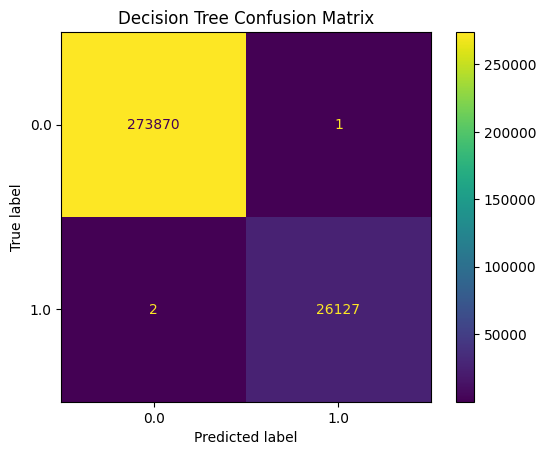

In [23]:
# Decision Tree Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_predictions)
ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dt_model.classes_).plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()

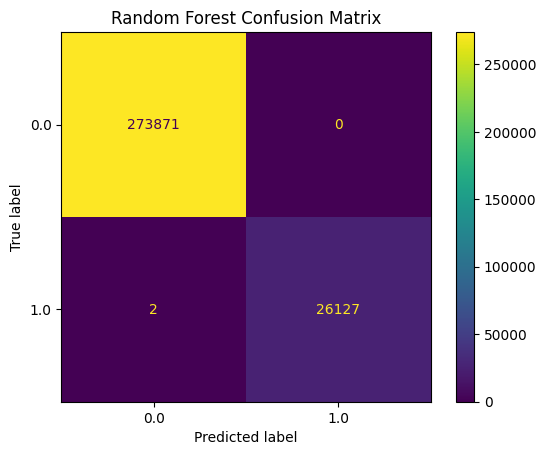

In [24]:
# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_model.classes_).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

### **7. Comparative Analysis**
Let's visualize the performance of both models using precision and recall in a bar chart.

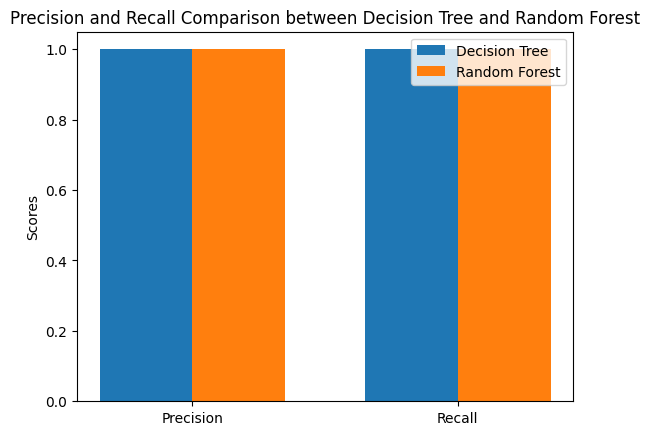

In [25]:
# Bar chart for Precision and Recall comparison
metrics = ['Precision', 'Recall']
dt_scores = [dt_precision, dt_recall]
rf_scores = [rf_precision, rf_recall]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, dt_scores, width, label='Decision Tree')
bars2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest')

ax.set_ylabel('Scores')
ax.set_title('Precision and Recall Comparison between Decision Tree and Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

### **8. Reflection & Discussion**
#### **Model Comparison:**
- Precision: The precision indicates how many of the predicted fraudulent transactions were actually fraudulent. A higher precision value means fewer false positives.
- Recall: The recall measures how many of the actual fraudulent transactions were correctly identified by the model. A higher recall value means fewer false negatives.
- Confusion Matrices: The confusion matrix helps us understand the true positives, false positives, true negatives, and false negatives for both models.
#Overfitting and Suitability:
Random Forest typically performs better due to its ability to handle overfitting better than Decision Trees. The ensemble method reduces variance and improves accuracy.
Decision Trees are simple and interpretable but prone to overfitting, especially with high-dimensional datasets.
Conclusion:
Random Forest is generally more suitable for fraud detection because of its ability to handle complex patterns and larger datasets effectively. However, Decision Trees are easier to interpret and may be sufficient for simpler datasets.

